## Submision Projek Akhir Klasifikasi Gambar

**Nama          : Marvi Yoga Pratama**

**Cohort ID     : mc222d5y1316**

**Email Academy : mc222d5y1316@student.devacademy.id**

**Link Dataset  : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset**

## Import Library

In [12]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Input

### Load CSV dan preview isinya

In [19]:
misrakahmed_vegetable_image_dataset_path = kagglehub.dataset_download('misrakahmed/vegetable-image-dataset')

print('Data source import complete.')

Data source import complete.


In [20]:
path  = '/kaggle/input/vegetable-image-dataset'

print('Dataset Path : ',path)

Dataset Path :  /kaggle/input/vegetable-image-dataset


In [21]:
dirs = os.listdir(path)

image_dirs = os.listdir(f'/{path}/{dirs[0]}')

sss = os.path.join(path,dirs[0])
print(os.listdir(sss))

paths = os.listdir(sss)
file_paths = []
file_names = []
file_labels=[]
for image in paths:
  image_path = os.path.join(sss,image)
  print(image_path)
  for directories in os.listdir(image_path):
      print(directories)
      for file in os.listdir(f'{image_path}/{directories}'):
          file_paths.append(f'{image_path}/{directories}/{file}')
          file_names.append(file)
          file_labels.append(directories)

dataset_df = pd.DataFrame({'path' : file_paths  , 'file_name' : file_names  , 'label' :file_labels})

['validation', 'test', 'train']
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation
Broccoli
Capsicum
Bottle_Gourd
Radish
Tomato
Brinjal
Pumpkin
Carrot
Papaya
Cabbage
Bitter_Gourd
Cauliflower
Bean
Cucumber
Potato
/kaggle/input/vegetable-image-dataset/Vegetable Images/test
Broccoli
Capsicum
Bottle_Gourd
Radish
Tomato
Brinjal
Pumpkin
Carrot
Papaya
Cabbage
Bitter_Gourd
Cauliflower
Bean
Cucumber
Potato
/kaggle/input/vegetable-image-dataset/Vegetable Images/train
Broccoli
Capsicum
Bottle_Gourd
Radish
Tomato
Brinjal
Pumpkin
Carrot
Papaya
Cabbage
Bitter_Gourd
Cauliflower
Bean
Cucumber
Potato


**Cek label/kategori**

In [22]:
dataset_df.columns


Index(['path', 'file_name', 'label'], dtype='object')

### Ubah Label Multi-Class ke Single Label

In [23]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

In [24]:
# Ubah label string menjadi angka
dataset_df['label_encoded'] = label_encoder.fit_transform(dataset_df['label'])

In [25]:
# Lihat mapping label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Bean': np.int64(0), 'Bitter_Gourd': np.int64(1), 'Bottle_Gourd': np.int64(2), 'Brinjal': np.int64(3), 'Broccoli': np.int64(4), 'Cabbage': np.int64(5), 'Capsicum': np.int64(6), 'Carrot': np.int64(7), 'Cauliflower': np.int64(8), 'Cucumber': np.int64(9), 'Papaya': np.int64(10), 'Potato': np.int64(11), 'Pumpkin': np.int64(12), 'Radish': np.int64(13), 'Tomato': np.int64(14)}


In [26]:
# Contoh tampilan DataFrame
dataset_df.head()

,path,file_name,label,label_encoded
0,/kaggle/input/vegetable-image-dataset/Vegetabl...,1269.jpg,Broccoli,4
1,/kaggle/input/vegetable-image-dataset/Vegetabl...,1385.jpg,Broccoli,4
2,/kaggle/input/vegetable-image-dataset/Vegetabl...,1383.jpg,Broccoli,4
3,/kaggle/input/vegetable-image-dataset/Vegetabl...,1354.jpg,Broccoli,4
4,/kaggle/input/vegetable-image-dataset/Vegetabl...,1339.jpg,Broccoli,4


### Visualisasi Distribusi Label

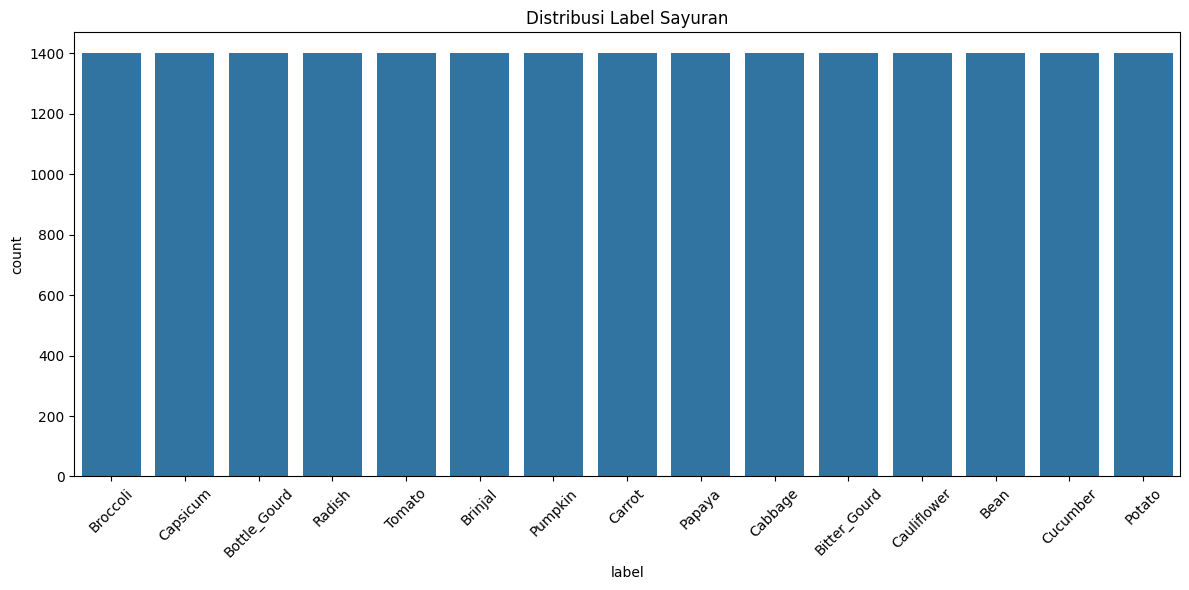

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset_df, x='label')
plt.xticks(rotation=45)
plt.title("Distribusi Label Sayuran")
plt.tight_layout()
plt.show()

### Split Dataset: Train, Validation, Test

In [28]:
train_df, test_df = train_test_split(dataset_df, test_size=0.2, stratify=dataset_df['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")

Train: 13440 | Val: 3360 | Test: 4200


In [29]:
# Simpan hasil split
os.makedirs("hasil_split", exist_ok=True)

train_df.to_csv("Hasil_Split/train_split.csv", index=False)
val_df.to_csv("Hasil_Split/val_split.csv", index=False)
test_df.to_csv("Hasil_Split/test_split.csv", index=False)

### Data Augmentation & Generator

In [30]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

val_gen = val_test_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

test_gen = val_test_datagen.flow_from_dataframe(
    test_df,
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 13440 validated image filenames belonging to 15 classes.
Found 3360 validated image filenames belonging to 15 classes.
Found 4200 validated image filenames belonging to 15 classes.


### Bangun Model CNN

In [31]:
num_classes = len(train_gen.class_indices)

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,830,287 (18.43 MB)

 Trainable params: 4,830,287 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

**Saya menggunakan Model CNN** untuk klasifikasi gambar dengan 4 kelas ini memiliki 3 blok konvolusi (Conv2D + MaxPooling2D) dengan jumlah filter berturut-turut 32, 64, dan 128. Input gambar berukuran 224x224 dengan 3 channel. Setelah ekstraksi fitur, layer Flatten meratakan output, diikuti Dropout 0.5. Layer Dense dengan 128 unit (ReLU) dan layer output dengan 4 neuron (softmax) digunakan untuk klasifikasi. Model dikompilasi dengan Adam, categorical_crossentropy, dan metrik akurasi. model.summary() menampilkan arsitektur dan jumlah parameter.

### Training Model

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Training
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.9564 - loss: 0.1354

420/420 ━━━━━━━━━━━━━━━━━━━━ 92s 219ms/step - accuracy: 0.9564 - loss: 0.1354 - val_accuracy: 0.9685 - val_loss: 0.1257
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9675 - loss: 0.1011

420/420 ━━━━━━━━━━━━━━━━━━━━ 89s 212ms/step - accuracy: 0.9675 - loss: 0.1011 - val_accuracy: 0.9729 - val_loss: 0.1122
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 91s 218ms/step - accuracy: 0.9733 - loss: 0.0853 - val_accuracy: 0.9652 - val_loss: 0.1243
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9622 - loss: 0.1266

420/420 ━━━━━━━━━━━━━━━━━━━━ 142s 217ms/step - accuracy: 0.9622 - loss: 0.1266 - val_accuracy: 0.9795 - val_loss: 0.0915
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 92s 219ms/step - accuracy: 0.9746 - loss: 0.0750 - val_accuracy: 0.9685 - val_loss: 0.1298
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 91s 217ms/step - accuracy: 0.9766 - loss: 0.0752 - val_accuracy: 0.9690 - val_loss: 0.1293
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 94s 223ms/step - accuracy: 0.9754 - loss: 0.0779 - val_accuracy: 0.9640 - val_loss: 0.1508
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 93s 221ms/step - accuracy: 0.9784 - loss: 0.0793 - val_accuracy: 0.9690 - val_loss: 0.1259
Epoch 9/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 93s 221ms/step - accuracy: 0.9787 - loss: 0.0698 - val_accuracy: 0.9750 - val_loss: 0.1014


### Visualisasi Akurasi & Loss

**Akurasi**

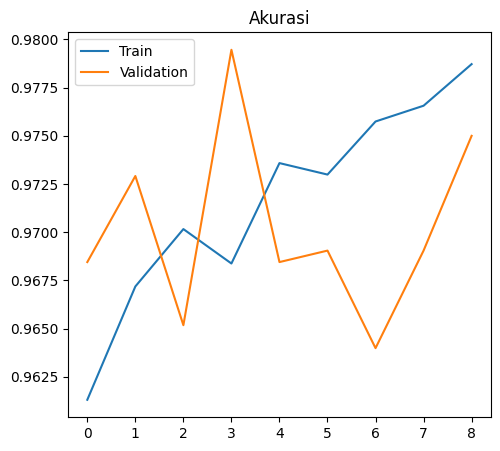

In [34]:
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Akurasi')
plt.legend()

plt.show()


**Loss**

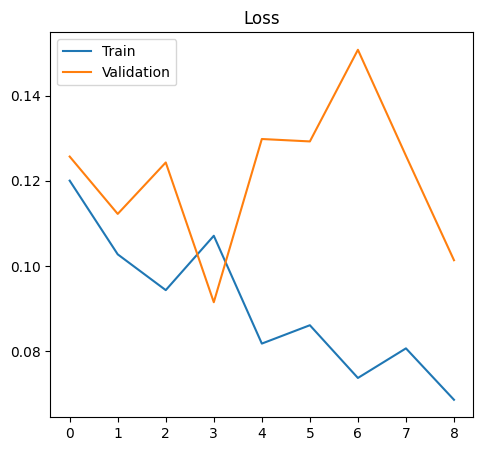

In [35]:
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()

### Simpan Sebagai SavedModel

In [36]:
model.export("saved_model")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  139502211157840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211158608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211161488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211160336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211160912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211162256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211159760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211163216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211161872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211164560: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Konversi ke TensorFlow Lite (TFLite)

**Instalasi TensorFlow.JS**

In [37]:
!pip install tensorflowjs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [38]:
!pip show tensorflowjs

Name: tensorflowjs
Version: 4.22.0
Summary: 
Home-page: https://js.tensorflow.org/
Author: Google LLC
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: flax, importlib_resources, jax, jaxlib, packaging, six, tensorflow, tensorflow-decision-forests, tensorflow-hub, tf-keras
Required-by: 


In [39]:
# Convert model.h5 to model
!tensorflowjs_converter --input_format=keras best_model.h5 tfjs_model

2025-04-24 14:16:53.033224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745504213.090886   12347 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745504213.110720   12347 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [40]:
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")

tflite_model = converter.convert()

# Simpan ke file
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

In [41]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.14.0.37.22
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confe